<a href="https://colab.research.google.com/github/Tursunali-portfolio/Customer_segmentation/blob/main/Customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fancyimpute

#Step 1: Importing libraries and datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
from fancyimpute import SoftImpute

In [3]:
df = pd.read_csv('./cc_dataset.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df[df['CASH_ADVANCE']==df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [8]:
df.drop(columns=['CUST_ID'], inplace=True)

#**Step 2: Visiulazation of dataset**

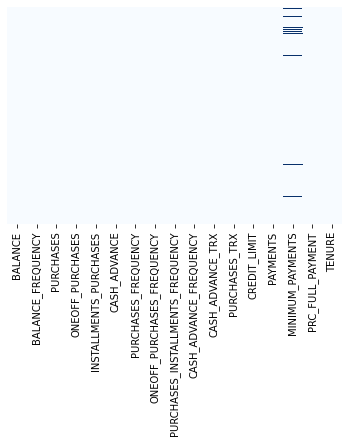

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [10]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [33]:
# Filling the NaN values with SoftImpute(fixes matrix missing values) output
# Scaling the data before passing to SoftImpute function
scaler = StandardScaler()
softimpute = SoftImpute()
scaled_df = scaler.fit_transform(df)
scaled_df = softimpute.fit_transform(scaled_df)

/usr/local/lib/python3.7/dist-packages/fancyimpute/solver.py:55: UserWarning:

Input matrix is not missing any values

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning:

If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.



[SoftImpute] Max Singular Value of X_init = 203.792726
[SoftImpute] Iter 1: observed MAE=0.024364 rank=16
[SoftImpute] Iter 2: observed MAE=0.024364 rank=16
[SoftImpute] Iter 3: observed MAE=0.024364 rank=16
[SoftImpute] Iter 4: observed MAE=0.024364 rank=16
[SoftImpute] Iter 5: observed MAE=0.024364 rank=16
[SoftImpute] Iter 6: observed MAE=0.024364 rank=16
[SoftImpute] Iter 7: observed MAE=0.024364 rank=16
[SoftImpute] Iter 8: observed MAE=0.024364 rank=16
[SoftImpute] Iter 9: observed MAE=0.024364 rank=16
[SoftImpute] Iter 10: observed MAE=0.024364 rank=16
[SoftImpute] Iter 11: observed MAE=0.024364 rank=16
[SoftImpute] Iter 12: observed MAE=0.024364 rank=16
[SoftImpute] Iter 13: observed MAE=0.024364 rank=16
[SoftImpute] Iter 14: observed MAE=0.024364 rank=16
[SoftImpute] Iter 15: observed MAE=0.024364 rank=16
[SoftImpute] Iter 16: observed MAE=0.024364 rank=16
[SoftImpute] Iter 17: observed MAE=0.024364 rank=16
[SoftImpute] Iter 18: observed MAE=0.024364 rank=16
[SoftImpute] Iter 

In [12]:
df = pd.DataFrame(scaler.inverse_transform(scaled_df), columns=df.columns)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

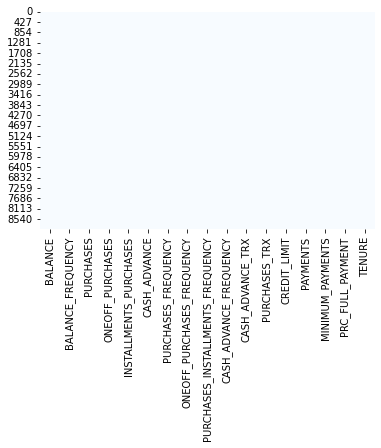

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")

In [14]:
# Check duplicates in dataset
df.duplicated().sum()

0

In [15]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,1.666670e-01,0.000000,0.083333,0.000000,0.0,2.0,1000.0,2.018021e+02,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,-5.551115e-17,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4.103033e+03,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.0,12.0,7500.0,6.220667e+02,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,8.333300e-02,0.083333,0.000000,0.083333,1.0,1.0,7500.0,2.273737e-13,752.706832,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,8.333300e-02,0.083333,0.000000,0.000000,0.0,1.0,1200.0,6.783348e+02,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000e+00,0.000000,0.833333,0.000000,0.0,6.0,1000.0,3.255945e+02,48.886365,0.500000,6.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000e+00,0.000000,0.833333,0.000000,0.0,6.0,1000.0,2.758613e+02,535.200006,0.000000,6.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,8.333330e-01,0.000000,0.666667,0.000000,0.0,5.0,1000.0,8.127077e+01,82.418369,0.250000,6.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,-5.551115e-17,0.000000,0.000000,0.166667,2.0,0.0,500.0,5.254996e+01,55.755628,0.250000,6.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

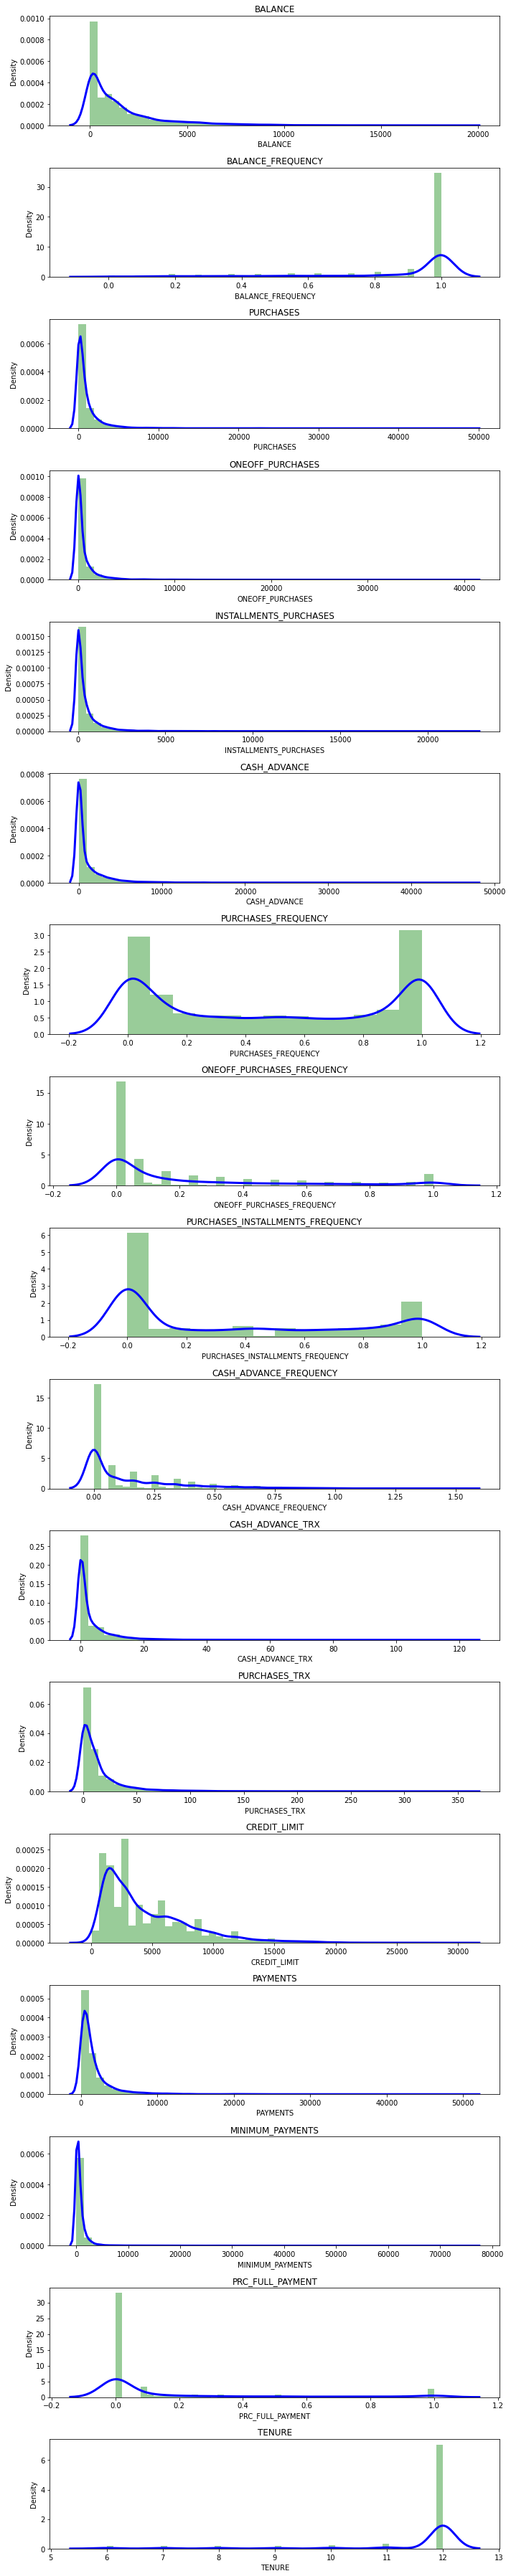

In [16]:
# distplot: combination of matplotlib.hist and seaborn.kdeplot()
# KDE: Kernel density estimate
# KDE for visiulazing probability density of a continious variable
plt.figure(figsize=(10,50))
for i in range(17):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color":"b", "lw":3,"label":"KDE"}, hist_kws={"color":"g"})
    plt.title(df.columns[i])

plt.tight_layout()

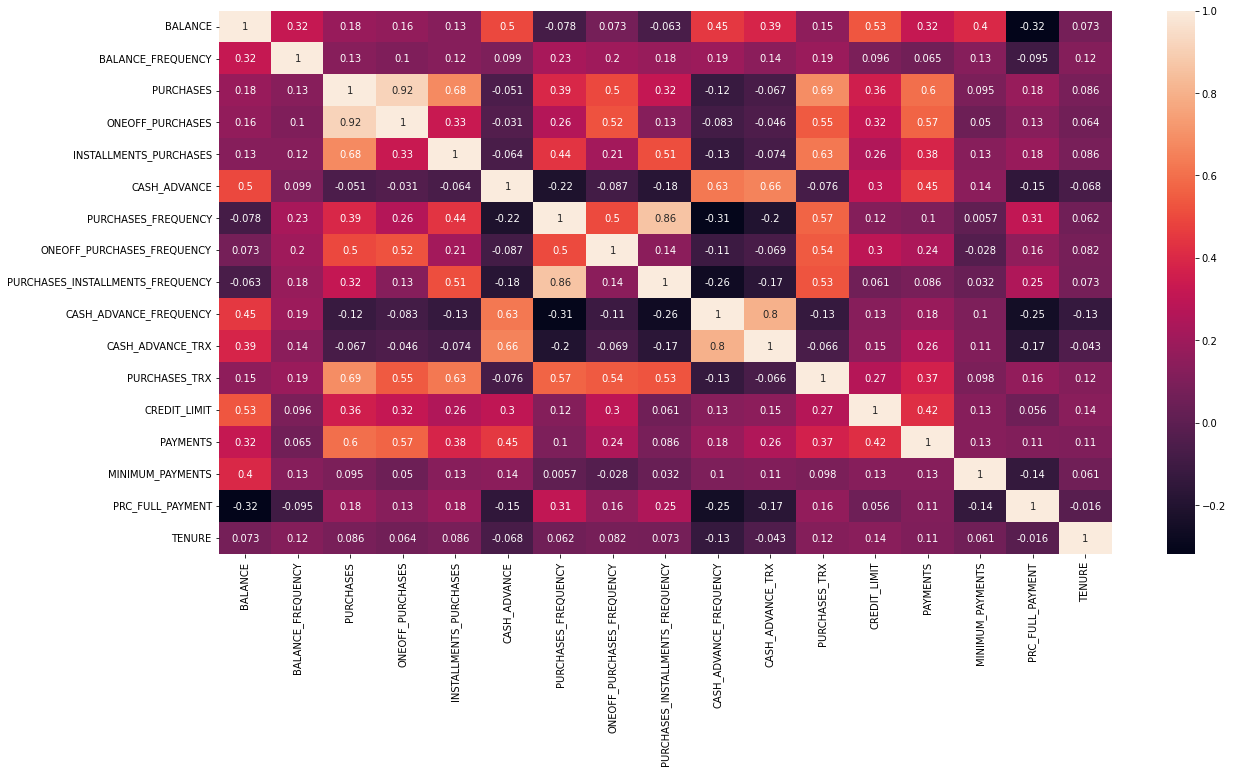

In [17]:
# Correlation matrix
correlations = df.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations, annot=True)

#Step 3: Elbow method

In [18]:
# We already have scaled data. Let's see it
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30548157,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08773463,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09986968,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32954733,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34078648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3270727 ,
        -0.52555097, -4.12276757]])

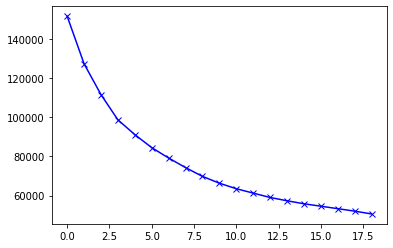

In [19]:
inertias=[]

for i in range(1, 20):
    kmean = KMeans(n_clusters=i)
    kmean.fit(scaled_df)
    inertias.append(kmean.inertia_)
    
plt.plot(inertias, 'bx-')

# Step 4: Apply **Kmeans**

In [20]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_df)

label = kmeans.labels_

In [21]:
kmeans.cluster_centers_.shape

(6, 17)

In [22]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.397281,0.308041,-0.067287,-0.245043,0.291055,-0.365718,0.965669,-0.376920,1.140680,-0.463153,-0.357947,0.122491,-0.329557,-0.251361,-0.055275,0.341859,-0.025686
1,-0.697844,-2.121553,-0.313038,-0.231015,-0.315659,-0.306912,-0.560037,-0.418705,-0.465064,-0.484403,-0.357813,-0.425746,-0.209716,-0.221025,-0.282539,0.261571,-0.165980
2,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171342,4.847281,1.085298,0.830765,0.333341
3,0.137676,0.427207,0.926437,0.877387,0.578596,-0.309096,1.087856,1.838892,0.542908,-0.405671,-0.318458,1.184038,0.692360,0.380207,-0.023804,0.435885,0.271440
4,-0.013451,0.371977,-0.344897,-0.223419,-0.404944,-0.084235,-0.824791,-0.334698,-0.769744,0.129351,-0.029709,-0.470148,-0.334706,-0.262085,-0.030310,-0.450938,-0.009006
5,1.591259,0.377871,-0.205797,-0.150031,-0.211064,1.943873,-0.454071,-0.186470,-0.409527,1.895921,1.846858,-0.246131,0.962254,0.770165,0.503472,-0.391972,-0.087048


In [23]:
cluster_centers = scaler.inverse_transform(cluster_centers)

cluster_centers = pd.DataFrame(data=cluster_centers, columns=df.columns)

cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,737.568641,0.950243,859.445776,185.716409,674.264951,211.943791,0.877920,0.090015,0.817773,0.042463,0.806104,17.754488,3295.318762,1005.477999,733.076994,0.253702,11.482944
1,111.971653,0.374694,334.395004,209.000465,125.620931,335.263311,0.265580,0.077550,0.179609,0.038210,0.807018,4.127384,3731.375296,1093.299450,193.937216,0.230220,11.295195
2,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415
3,1851.036530,0.978472,2982.551670,2048.720612,934.284573,330.682005,0.926960,0.751035,0.580203,0.053965,1.075586,44.140590,7013.678967,2833.805467,807.735737,0.281204,11.880574
4,1536.476942,0.965389,266.326060,221.606995,44.881962,802.226792,0.159322,0.102611,0.058521,0.161029,3.046083,3.023700,3276.585473,974.432748,792.300983,0.021823,11.505267
5,4876.546020,0.966785,563.515868,343.416167,220.204731,5055.264293,0.308110,0.146830,0.201681,0.514537,15.852273,8.591942,7995.717506,3962.696916,2058.598703,0.039069,11.400826


In [24]:
df_cluster = pd.concat([df, pd.DataFrame({'labels':label})], axis=1)
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [25]:
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,1.666670e-01,0.000000,0.083333,0.000000,0.0,2.0,1000.0,2.018021e+02,139.509787,0.000000,12.0,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,-5.551115e-17,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4.103033e+03,1072.340217,0.222222,12.0,5
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000e+00,1.000000,0.000000,0.000000,0.0,12.0,7500.0,6.220667e+02,627.284787,0.000000,12.0,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,8.333300e-02,0.083333,0.000000,0.083333,1.0,1.0,7500.0,2.273737e-13,752.706832,0.000000,12.0,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,8.333300e-02,0.083333,0.000000,0.000000,0.0,1.0,1200.0,6.783348e+02,244.791237,0.000000,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000e+00,0.000000,0.833333,0.000000,0.0,6.0,1000.0,3.255945e+02,48.886365,0.500000,6.0,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000e+00,0.000000,0.833333,0.000000,0.0,6.0,1000.0,2.758613e+02,535.200006,0.000000,6.0,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,8.333330e-01,0.000000,0.666667,0.000000,0.0,5.0,1000.0,8.127077e+01,82.418369,0.250000,6.0,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,-5.551115e-17,0.000000,0.000000,0.166667,2.0,0.0,500.0,5.254996e+01,55.755628,0.250000,6.0,4


# Step 5: Visiulazation

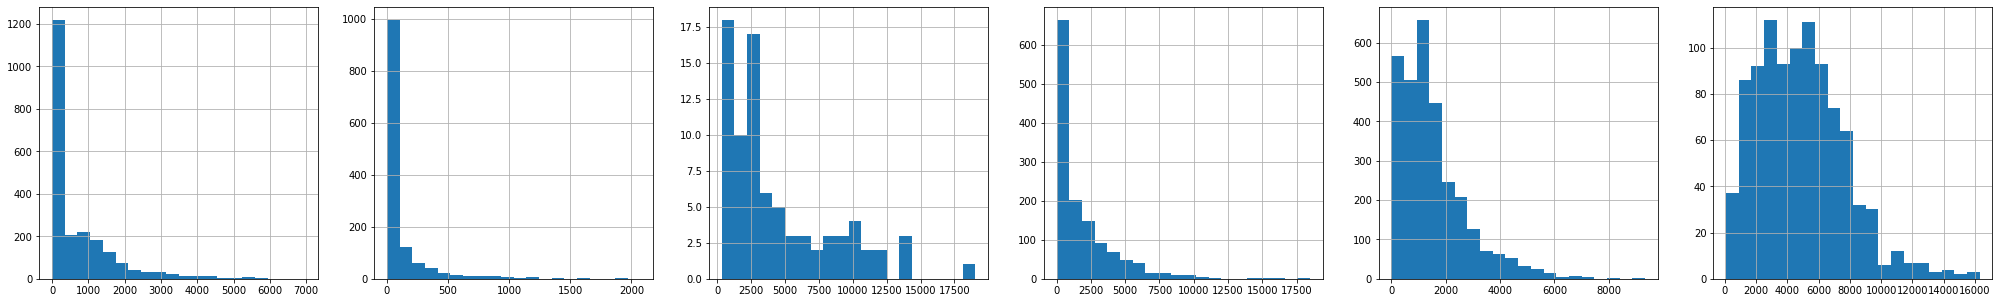

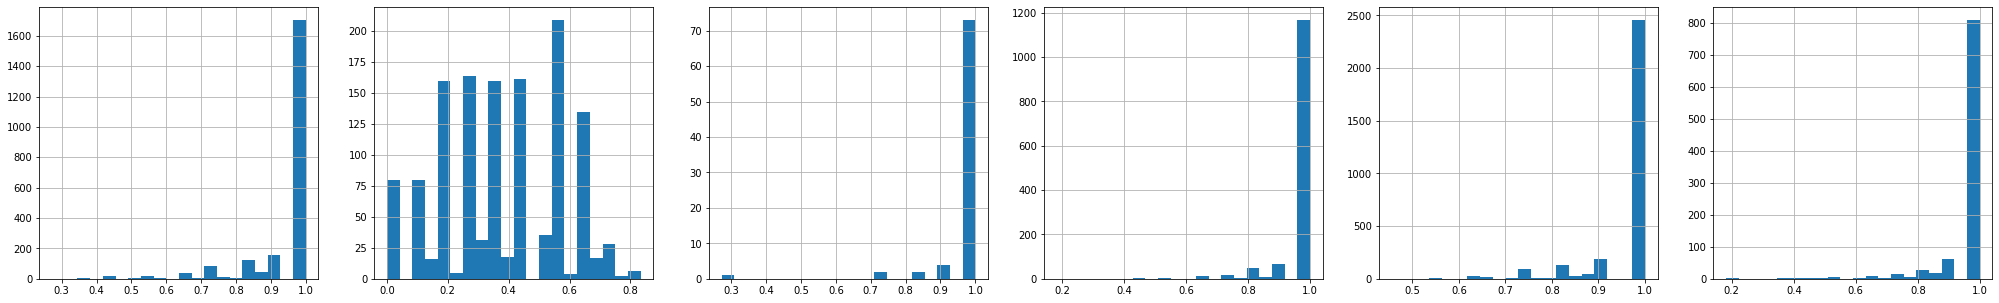

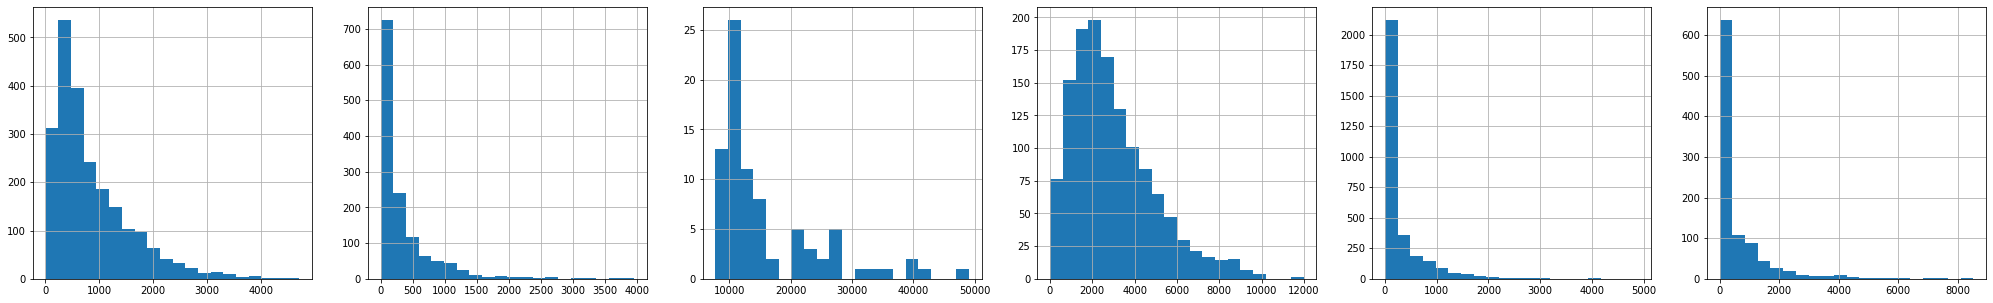

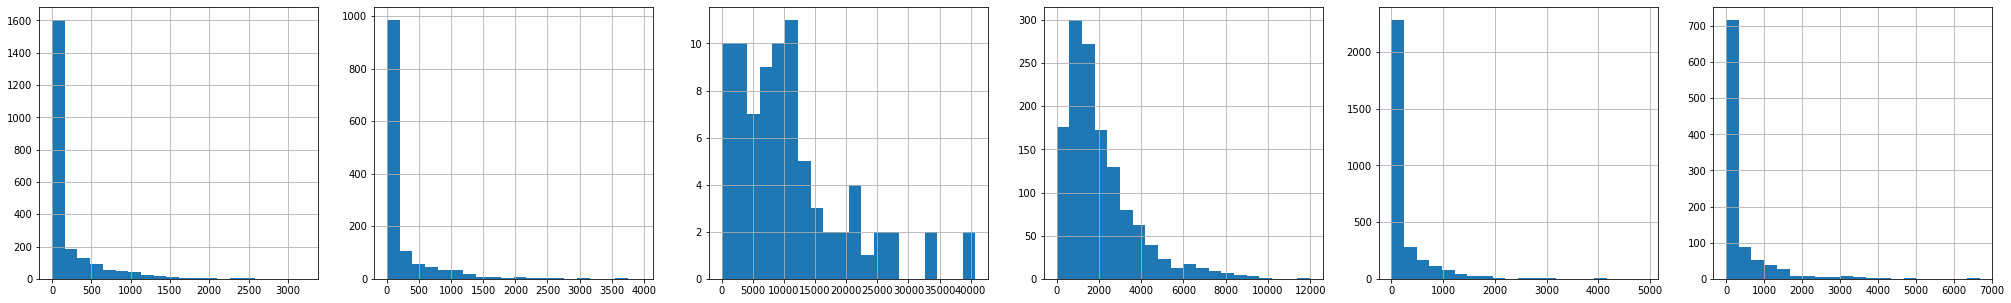

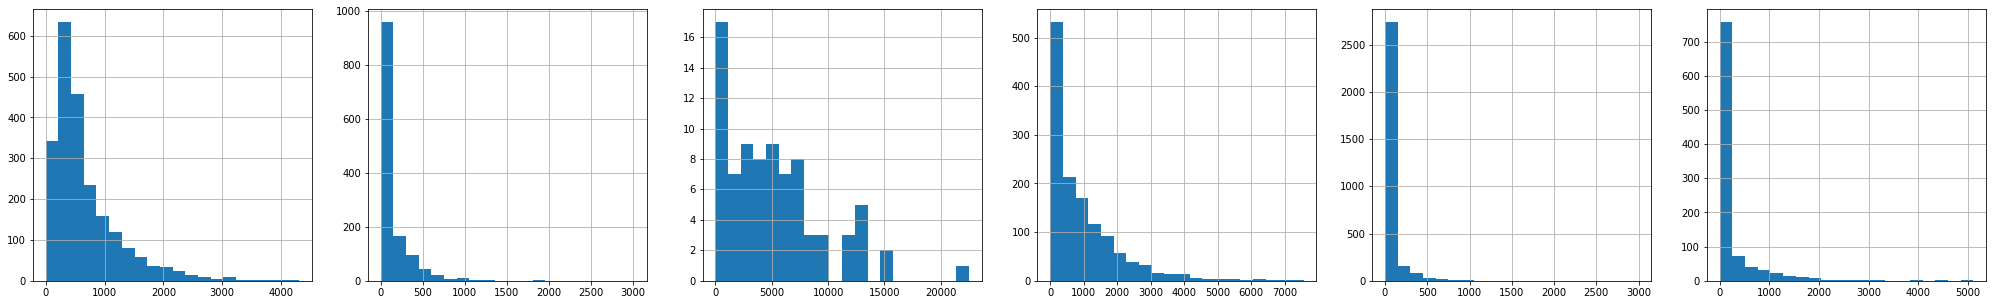

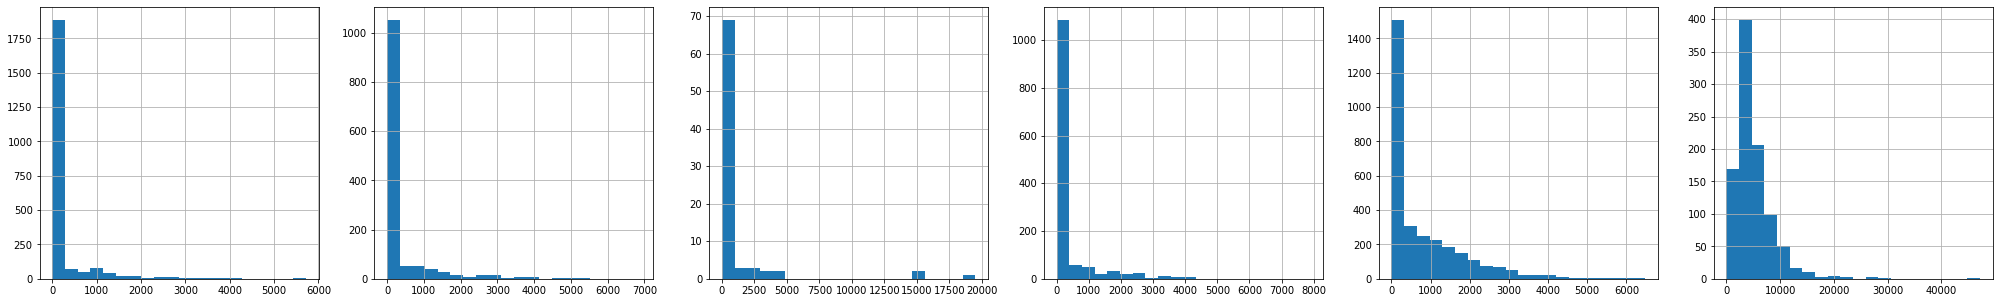

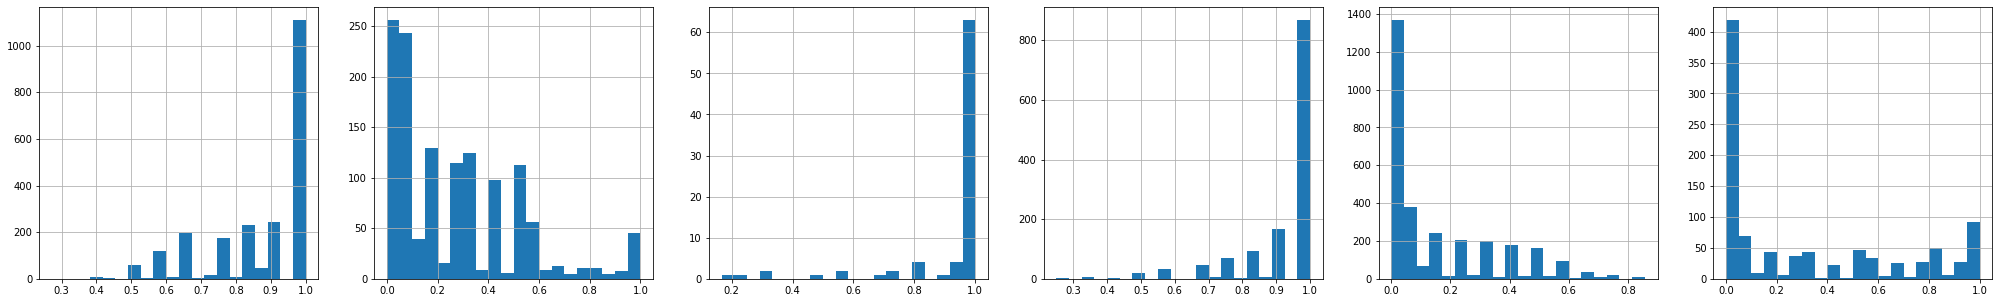

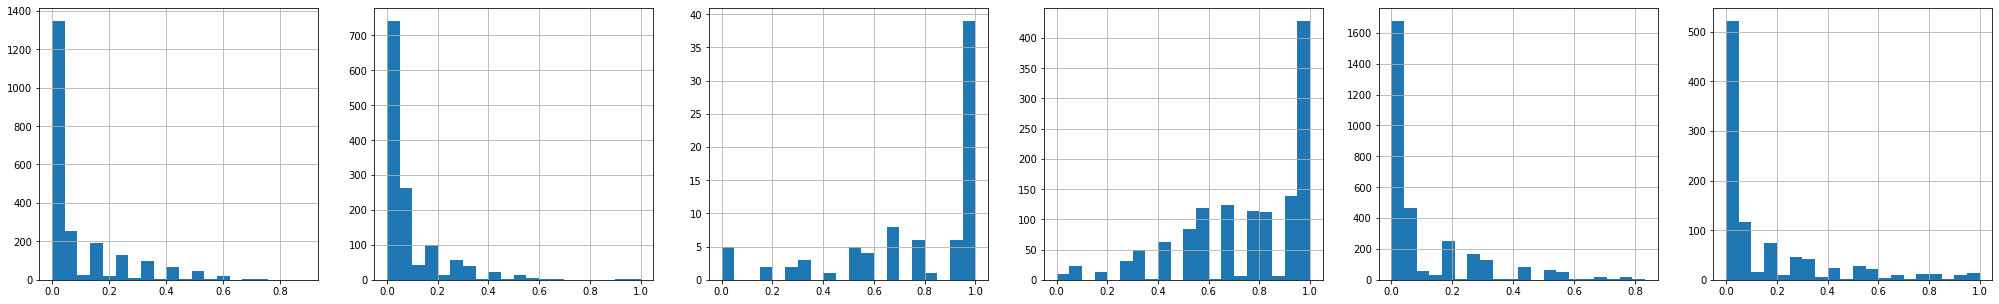

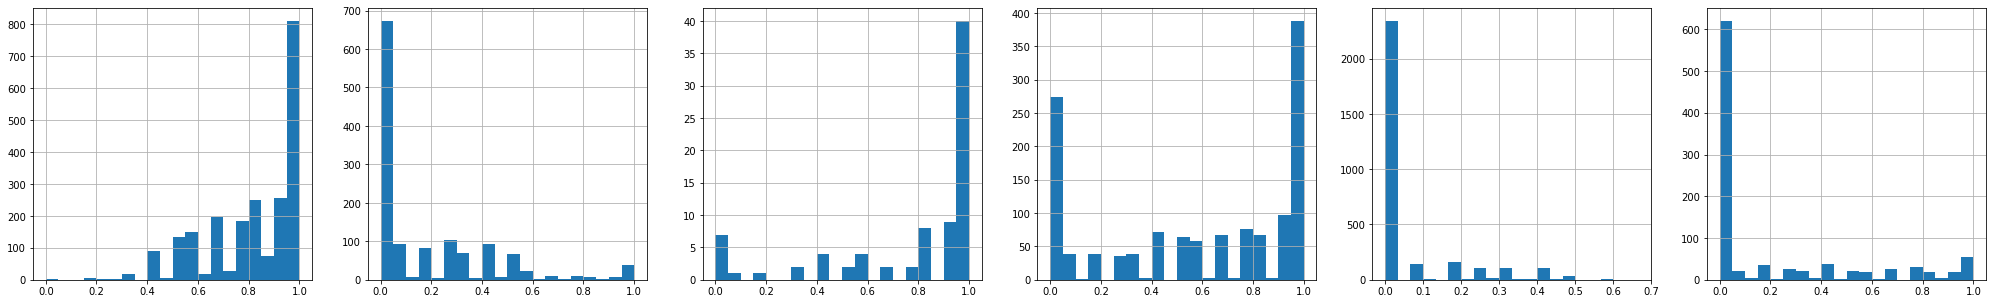

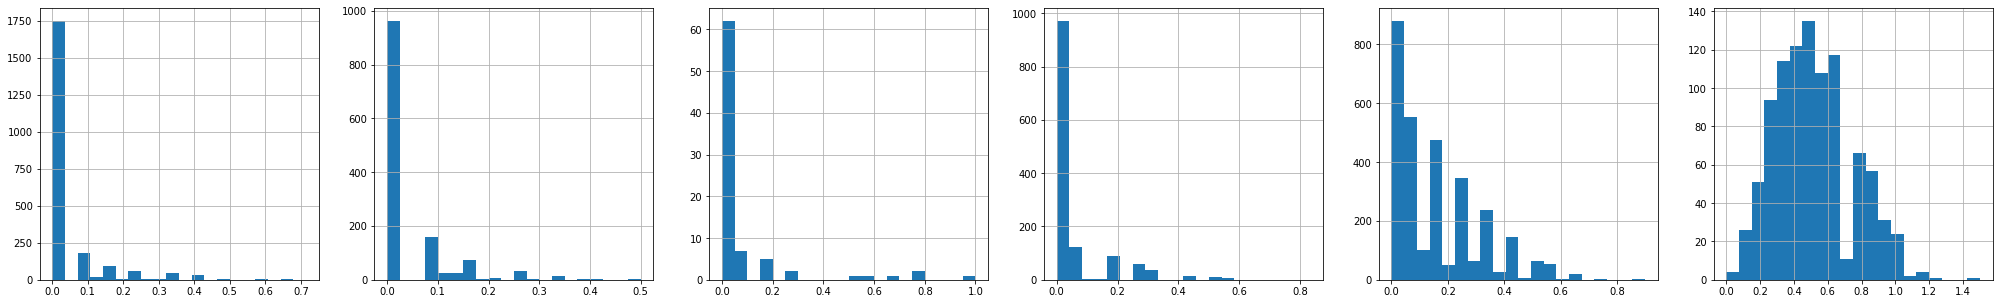

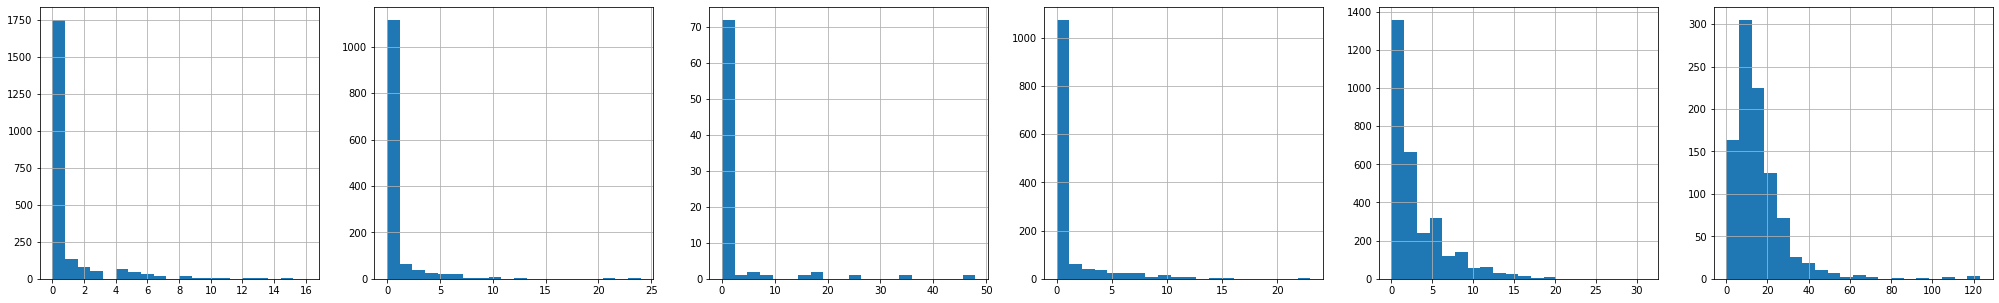

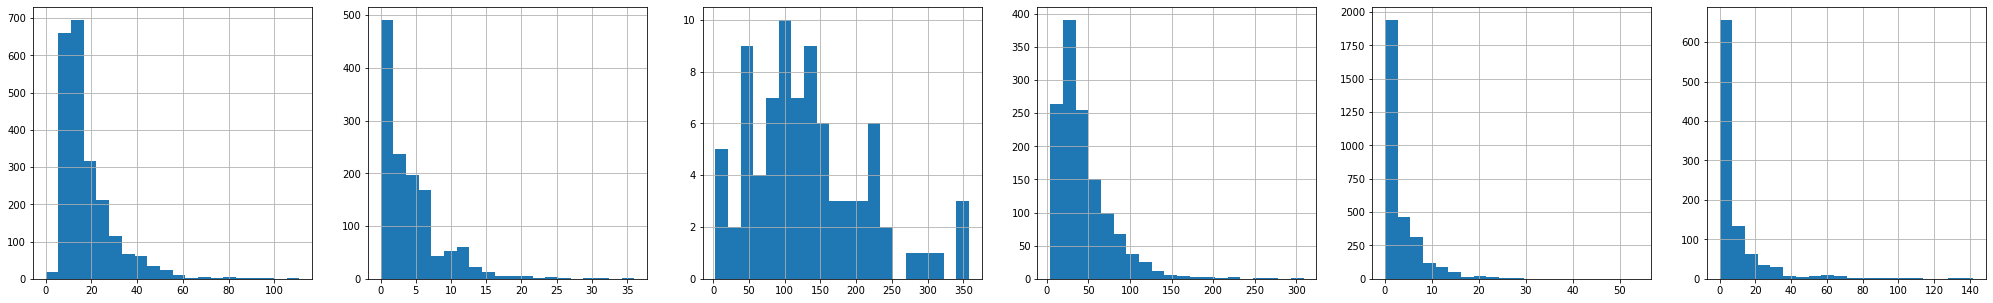

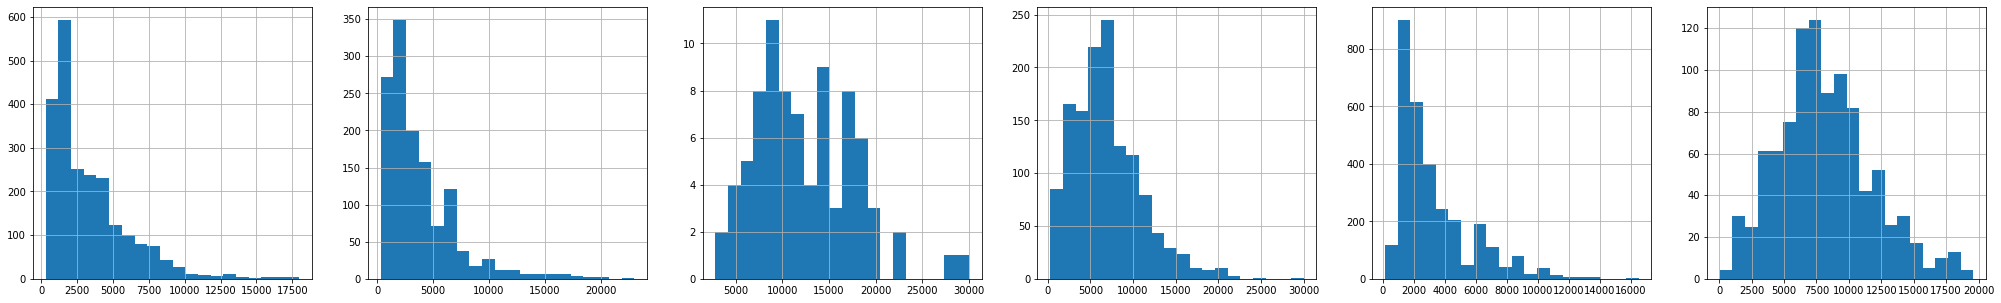

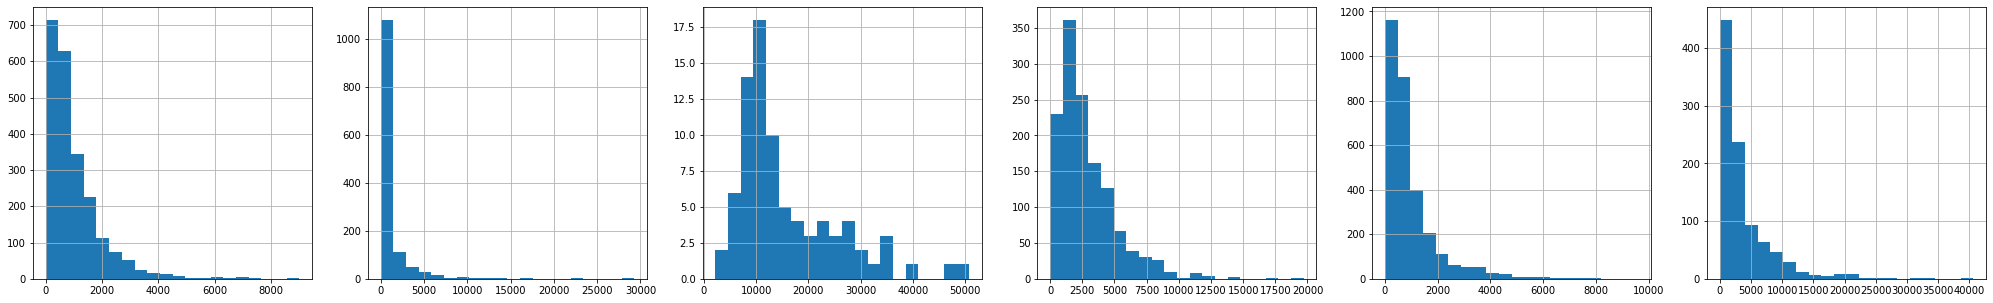

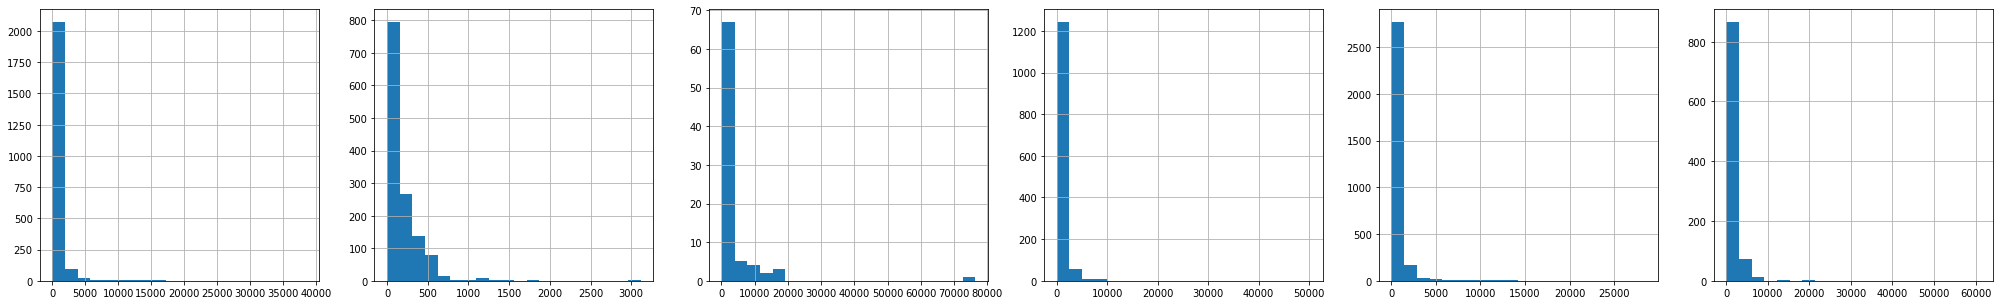

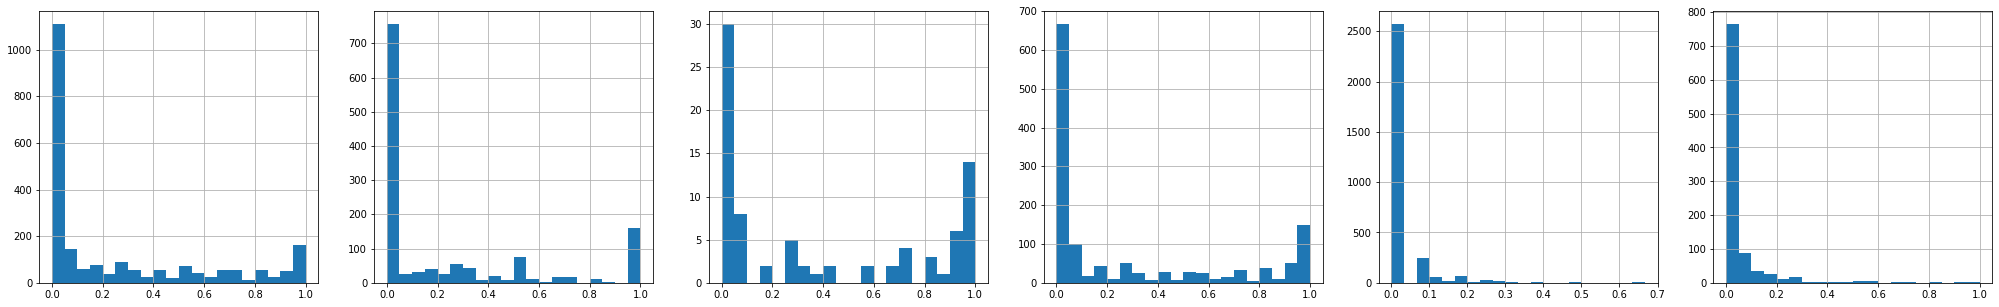

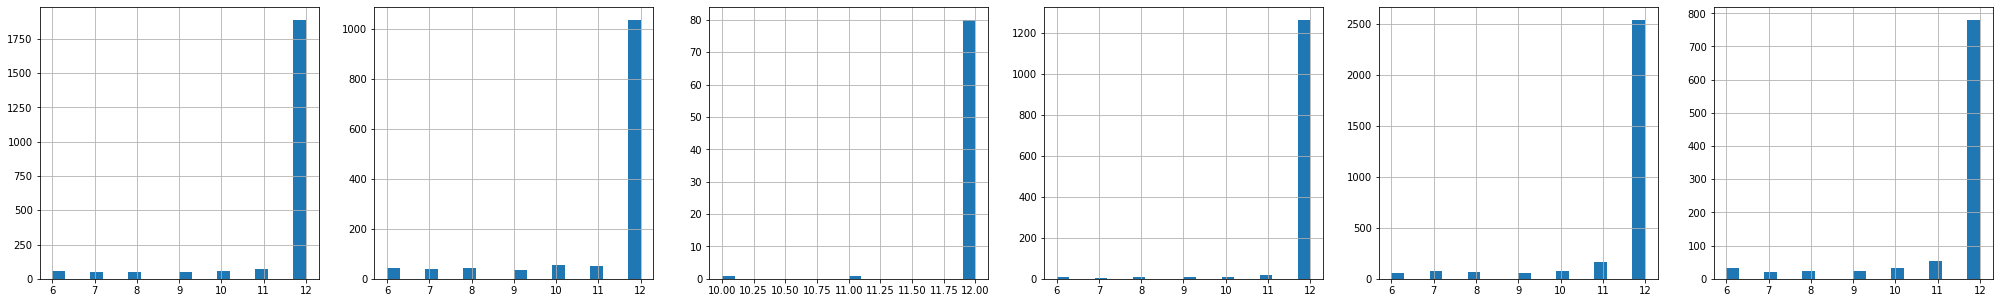

In [27]:
# plot histogram
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(6):
        plt.subplot(1,6,j+1)
        cluster=df_cluster[df_cluster['labels']==float(j)]
        cluster[i].hist(bins=20)
    plt.show()

# Step 6: PCA

In [29]:
# Dimensiality reduction
pca = PCA(n_components=3)
principal_comps = pca.fit_transform(scaled_df)
principal_comps

array([[-1.68197506, -1.07442927,  0.4876386 ],
       [-1.13751066,  2.50800062,  0.59887998],
       [ 0.97005575, -0.38192929,  0.09643754],
       ...,
       [-0.92623485, -1.80899334, -0.47734185],
       [-2.33636624, -0.65540135,  0.96992773],
       [-0.55642548, -0.39841542,  1.00991157]])

In [30]:
pca_df = pd.concat([pd.DataFrame(data=principal_comps, columns=['x', 'y', 'z']), pd.DataFrame({'labels':label})], axis=1)
pca_df

,x,y,z,labels
0,-1.681975,-1.074429,0.487639,4
1,-1.137511,2.508001,0.598880,5
2,0.970056,-0.381929,0.096438,3
3,-0.876458,0.035104,1.475128,4
4,-1.598976,-0.686130,0.361706,4
...,...,...,...,...
8945,-0.359513,-2.013605,-1.001956,0
8946,-0.572862,-1.661695,-1.260426,0
8947,-0.926235,-1.808993,-0.477342,0
8948,-2.336366,-0.655401,0.969928,4


In [31]:
fig = px.scatter_3d(pca_df, x="x", y="y", z='z', color="labels")
fig.show()